In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
df = pd.read_json('../Data2.json')
df.sort_index(inplace=True)
df.shape

(3526, 21)

# English exams (IELTS , Tofel)

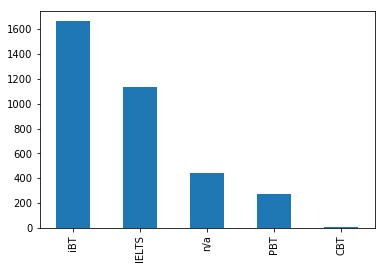

In [57]:
df['engExamType'].value_counts().plot(kind='bar')
plt.show()

## Data with null Type also have null Result

In [58]:
df[df['engExamType']=='n/a'].count()[0]

442

In [59]:
df[df['engExamType']=='n/a']["engExamResult"].value_counts()

n/a    442
Name: engExamResult, dtype: int64

#### 442 Missing data

## Strings to Float

In [60]:
df['engExamResult']=df['engExamResult'].apply(pd.to_numeric, errors='coerce')

### IELTS data

In [61]:
df[df['engExamType']=='IELTS']["engExamResult"].value_counts().sort_index()

4.0      1
5.0      5
5.5     30
6.0    191
6.5    440
7.0    264
7.5    148
8.0     41
8.2      1
8.5     10
9.0      3
Name: engExamResult, dtype: int64

In [62]:
df["engExamResult"].replace('8.2',8.5,inplace=True)
# Replacing 8.2 with 8.5. We guess it was probably typo.

### CBT data 

In [63]:
df[df['engExamType']=='CBT']["engExamResult"]

80      280.0
2070     15.0
2651    102.0
3021     47.0
3584    104.0
Name: engExamResult, dtype: float64

### PBT data

In [64]:
df[df['engExamType']=='PBT']["engExamResult"].sort_values().head(10)

1573     6.0
4120     6.5
2340     7.0
3465     7.0
4290     7.5
683     17.0
1230    50.0
2382    87.0
3210    88.0
178     92.0
Name: engExamResult, dtype: float64

In [65]:
# We suppose data under score 9 were IELTS
# So we changed their Type to IELTS
df.set_value(1573, 'engExamType', 'IELTS')
df.set_value(4120, 'engExamType', 'IELTS')
df.set_value(2340, 'engExamType', 'IELTS')
df.set_value(3465, 'engExamType', 'IELTS')
df.set_value(4290, 'engExamType', 'IELTS')
df[df['engExamType']=='PBT']["engExamResult"].sort_values().head(10)

683      17.0
1230     50.0
2382     87.0
3210     88.0
178      92.0
4026     97.0
239      98.0
3928     98.0
1110    104.0
1354    108.0
Name: engExamResult, dtype: float64

### iBT data

In [66]:
df[df['engExamType']=='iBT']["engExamResult"].sort_values().head(10)

4157     6.5
3059     7.0
2131    62.0
4182    70.0
3664    70.0
3443    72.0
2703    72.0
476     73.0
1638    74.0
996     75.0
Name: engExamResult, dtype: float64

In [67]:
# We suppose data under score 9 were IELTS
# So we changed their Type to IELTS
df.set_value(4157, 'engExamType', 'IELTS')
df.set_value(3059, 'engExamType', 'IELTS')
df[df['engExamType']=='iBT']["engExamResult"].sort_values().head(10)

2131    62.0
3664    70.0
4182    70.0
3443    72.0
2703    72.0
476     73.0
1638    74.0
996     75.0
1724    75.0
732     75.0
Name: engExamResult, dtype: float64

# Now We try to scale our features and fill missing data

### Filling Type==N/A

In [68]:
df[(df['engExamType']=='n/a')]["engExamResult"].dropna().count()

0

** So all records with Type==N/A have no "engExamResult" . Thus we've no other features to find examType from that **

## Converting

base of : http://www.eurogates.nl/en-TOEFL-IELTS-score-conversion/

In [69]:
# General Function to convert to IELTS
def toielts(iscore,binss):
    return pd.cut(iscore, bins=binss,labels=np.arange(4.5,9.5,0.5)) 

#### iBT to IELTS

In [70]:
bins_ibt=[52,58,64,71,78,86,95,97,110,115,120]
ibt=df[df['engExamType']=='iBT']["engExamResult"]
x=toielts(ibt,bins_ibt)
df.ix[(df.engExamType =='iBT'),"engExamResult"]=x
pd.concat([x, ibt],axis=1).head(7)

,engExamResult,engExamResult
3,8.0,100.0
5,8.0,100.0
6,7.0,92.0
7,8.0,103.0
9,8.0,107.0
13,8.0,110.0
15,8.0,105.0


#### CBT to IELTS

In [71]:
bins_cbt=[150,170,180,195,210,225,240,255,270,285,300]
cbt=df[df['engExamType']=='CBT']["engExamResult"]
x=toielts(cbt,bins_cbt)
df.ix[(df.engExamType =='CBT'),"engExamResult"]=x
pd.concat([x, cbt],axis=1)

,engExamResult,engExamResult
80,8.5,280.0
2070,NaN,15.0
2651,NaN,102.0
3021,NaN,47.0
3584,NaN,104.0


#### PBT to IELTS

In [72]:
bins_pbt=[473,491,510,528,547,567,587,612,637,657,677]
pbt=df[df['engExamType']=='PBT']["engExamResult"]
x=toielts(pbt,bins_pbt)
df.ix[(df.engExamType =='PBT'),"engExamResult"]=x
pd.concat([x, pbt],axis=1)

,engExamResult,engExamResult
12,7.5,603.0
17,7.0,573.0
18,7.5,597.0
19,7.5,600.0
20,8.5,653.0
21,7.5,607.0
22,7.5,597.0
24,6.5,567.0
26,6.5,560.0
30,7.5,590.0


## Droping engType column (all data==IELTS)

In [73]:
del df['engExamType']

### Filling Result==N/A with Average

In [74]:
mean=df['engExamResult'].dropna().astype(float).mean()
df['engExamResult'].fillna(mean).head(10)

2     7.153244
3     8.000000
5     8.000000
6     7.000000
7     8.000000
8     6.500000
9     8.000000
10    7.500000
12    7.500000
13    8.000000
Name: engExamResult, dtype: float64

In [75]:
df.ix[(df.engExamResult==np.nan)]

,accUni,apDegree,apUni,bachelorsAvg,bachelorsUni,country,engExamAnlt,engExamQuan,engExamResult,engExamVrbl,extra,field,fund,fundType,masterAvg,masterUni,papersGLOB,papersIRAN,rejUni,year


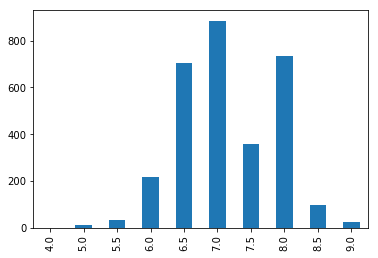

In [76]:
df.engExamResult.value_counts().sort_index().plot(kind='bar')
plt.show()

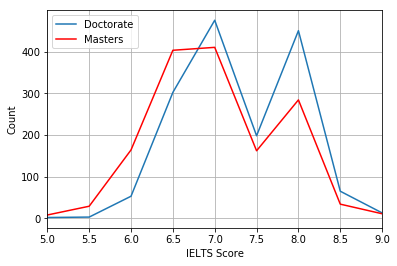

In [77]:
df[df['apDegree']=='Doctorate']['engExamResult'].value_counts().sort_index().plot(kind='line')
df[df['apDegree']=='Masters']['engExamResult'].value_counts().sort_index().plot(kind='line',c='r')
axes = plt.axes()
axes.set_xlim([5,9])
axes.grid()
plt.ylabel('Count')
plt.xlabel('IELTS Score')
plt.legend(['Doctorate', 'Masters'], loc = 2)
plt.show()

In [78]:
import math
df.engExamResult.fillna(math.ceil(df.engExamResult.mean()),inplace=True)

In [79]:
# for i in df.engExamResult.index:
#     d=df.engExamResult[i]
#     if d>7.5:
#         df.set_value(i,'eng','VeryHigh')
#     elif d>=7:
#         df.set_value(i,'eng','High')
#     elif d>=6:
#         df.set_value(i,'eng','Medium')
#     elif d>=5:
#         df.set_value(i,'eng','Low')
#     elif d>=4:
#         df.set_value(i,'eng','VeryLow')

In [80]:
df.shape

(3526, 20)

## Saving Data

In [81]:
df.to_json('Data_FixedENG.json',date_format='utf8')